In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumMyeongjo'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

NanumMyeongjo
NanumMyeongjo
NanumMyeongjo
NanumMyeongjo
['NanumMyeongjo']


In [3]:
gr_df = pd.read_csv('data/growth_rate_by_industry1.csv', encoding='euc-kr')

In [4]:
gr_df

,남북한별,산업별,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,북한,국내총생산,-4.3,-4.4,-7.1,-4.5,-2.1,-4.4,-3.4,-6.5,...,1.3,1.1,1.0,-1.1,3.9,-3.5,-4.1,0.4,-4.5,-0.1
1,북한,농림어업,-10.5,2.6,-3.3,-8.0,2.8,-11.1,1.1,-2.7,...,3.9,1.9,1.2,-0.8,2.5,-1.3,-1.8,1.4,-7.6,6.2
2,북한,광공업,-3.7,-12.3,-15.3,-3.4,-4.3,-4.1,-9.1,-17.7,...,1.3,1.5,1.1,-3.1,6.2,-8.5,-12.3,-0.9,-5.9,-6.5
3,북한,광업,-5.6,-6.9,-5.7,-7.2,-5.2,-0.6,-12.0,-15.8,...,0.8,2.1,1.6,-2.6,8.4,-11.0,-17.8,-0.7,-9.6,-11.7
4,북한,제조업,-3.2,-13.9,-18.3,-2.0,-3.9,-5.3,-8.0,-18.3,...,1.6,1.1,0.8,-3.4,4.8,-6.9,-9.1,-1.1,-3.8,-3.3
5,북한,경공업,0.9,-4.5,-7.6,5.2,0.1,-5.0,-5.8,-14.2,...,4.7,1.4,1.5,-0.8,1.1,0.1,-2.6,1.0,-7.5,-2.6
6,북한,중화학공업,-4.1,-16.1,-21.3,-4.5,-5.5,-5.4,-9.0,-20.3,...,0.2,1.0,0.5,-4.6,6.7,-10.4,-12.4,-2.3,-1.6,-3.7
7,북한,전기·가스·수도업,-3.8,-5.1,-6.3,-9.6,4.4,-0.1,-8.5,-10.5,...,1.6,2.3,-2.8,-12.7,22.3,-2.9,5.7,-4.2,1.6,6.0
8,북한,건설업,5.9,-3.6,-2.4,-9.7,-26.9,-3.3,-11.8,-10.0,...,-1.6,-1.0,1.4,4.8,1.2,-4.4,-4.4,2.9,1.3,1.8
9,북한,서비스업,0.7,2.7,0.8,1.3,2.3,1.5,1.0,1.1,...,0.1,0.3,1.3,0.8,0.6,0.5,0.9,0.9,-4.0,-0.4


In [5]:
gr_df.to_csv('data/1전.csv')

In [6]:
gr_df_sk = gr_df.loc[12:23]

In [7]:
gr_df_sk

,남북한별,산업별,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,남한,국내총생산,9.9,10.8,6.2,6.9,9.3,9.6,7.9,6.2,...,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.1
13,남한,농림어업,-5.6,3.2,9.0,-4.2,0.1,6.8,3.9,4.3,...,-0.5,4.2,5.1,-0.2,-5.6,2.3,0.2,3.9,-5.8,3.8
14,남한,광공업,10.8,13.8,5.6,7.0,11.6,12.7,8.7,6.2,...,1.4,3.1,3.2,1.6,2.3,3.7,3.3,1.1,-1.1,6.9
15,남한,광업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,-7.4,-6.2,-3.2,1.4
16,남한,제조업,11.3,14.1,6.0,7.2,11.6,13.0,8.9,6.3,...,1.4,3.1,3.2,1.7,2.3,3.7,3.3,1.1,-1.1,6.9
17,남한,경공업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,0.9,-2.8,-2.3,2.5
18,남한,중화학공업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,3.8,1.9,-0.8,7.8
19,남한,전기·가스·수도업,16.9,11.2,13.5,13.2,13.7,7.4,10.9,9.5,...,1.8,-2.5,2.5,3.1,-1.2,6.2,-1.7,4.3,4.1,4.0
20,남한,건설업,23.5,12.0,-1.5,8.8,4.5,5.2,6.8,1.4,...,-0.5,4.3,1.5,6.2,9.8,5.9,-2.8,-2.6,-1.3,-2.6
21,남한,서비스업,9.3,10.5,8.0,8.2,9.4,9.1,7.8,7.2,...,3.4,3.6,3.1,3.1,2.9,2.6,3.8,3.4,-0.8,3.8


In [8]:
del gr_df_sk['남북한별']
del gr_df_sk['산업별']
gr_df_sk

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,9.9,10.8,6.2,6.9,9.3,9.6,7.9,6.2,-5.1,11.5,...,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.1
13,-5.6,3.2,9.0,-4.2,0.1,6.8,3.9,4.3,-7.6,5.1,...,-0.5,4.2,5.1,-0.2,-5.6,2.3,0.2,3.9,-5.8,3.8
14,10.8,13.8,5.6,7.0,11.6,12.7,8.7,6.2,-7.2,20.5,...,1.4,3.1,3.2,1.6,2.3,3.7,3.3,1.1,-1.1,6.9
15,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,-7.4,-6.2,-3.2,1.4
16,11.3,14.1,6.0,7.2,11.6,13.0,8.9,6.3,-7.1,20.7,...,1.4,3.1,3.2,1.7,2.3,3.7,3.3,1.1,-1.1,6.9
17,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,0.9,-2.8,-2.3,2.5
18,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,3.8,1.9,-0.8,7.8
19,16.9,11.2,13.5,13.2,13.7,7.4,10.9,9.5,0.9,10.8,...,1.8,-2.5,2.5,3.1,-1.2,6.2,-1.7,4.3,4.1,4.0
20,23.5,12.0,-1.5,8.8,4.5,5.2,6.8,1.4,-11.1,-7.0,...,-0.5,4.3,1.5,6.2,9.8,5.9,-2.8,-2.6,-1.3,-2.6
21,9.3,10.5,8.0,8.2,9.4,9.1,7.8,7.2,-2.4,9.3,...,3.4,3.6,3.1,3.1,2.9,2.6,3.8,3.4,-0.8,3.8


In [9]:
gr_df_sk.index = ['국내총생산','농림어업','광공업','광업','제조업','경공업','중화학공업','전기.가스.수도업','건설업','서비스업','정부','기타']
gr_df_sk

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
국내총생산,9.9,10.8,6.2,6.9,9.3,9.6,7.9,6.2,-5.1,11.5,...,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.1
농림어업,-5.6,3.2,9.0,-4.2,0.1,6.8,3.9,4.3,-7.6,5.1,...,-0.5,4.2,5.1,-0.2,-5.6,2.3,0.2,3.9,-5.8,3.8
광공업,10.8,13.8,5.6,7.0,11.6,12.7,8.7,6.2,-7.2,20.5,...,1.4,3.1,3.2,1.6,2.3,3.7,3.3,1.1,-1.1,6.9
광업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,-7.4,-6.2,-3.2,1.4
제조업,11.3,14.1,6.0,7.2,11.6,13.0,8.9,6.3,-7.1,20.7,...,1.4,3.1,3.2,1.7,2.3,3.7,3.3,1.1,-1.1,6.9
경공업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,0.9,-2.8,-2.3,2.5
중화학공업,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,3.8,1.9,-0.8,7.8
전기.가스.수도업,16.9,11.2,13.5,13.2,13.7,7.4,10.9,9.5,0.9,10.8,...,1.8,-2.5,2.5,3.1,-1.2,6.2,-1.7,4.3,4.1,4.0
건설업,23.5,12.0,-1.5,8.8,4.5,5.2,6.8,1.4,-11.1,-7.0,...,-0.5,4.3,1.5,6.2,9.8,5.9,-2.8,-2.6,-1.3,-2.6
서비스업,9.3,10.5,8.0,8.2,9.4,9.1,7.8,7.2,-2.4,9.3,...,3.4,3.6,3.1,3.1,2.9,2.6,3.8,3.4,-0.8,3.8


In [10]:
T_gr = gr_df_sk.T
T_gr

,국내총생산,농림어업,광공업,광업,제조업,경공업,중화학공업,전기.가스.수도업,건설업,서비스업,정부,기타
1990,9.9,-5.6,10.8,...,11.3,...,...,16.9,23.5,9.3,...,...
1991,10.8,3.2,13.8,...,14.1,...,...,11.2,12.0,10.5,...,...
1992,6.2,9.0,5.6,...,6.0,...,...,13.5,-1.5,8.0,...,...
1993,6.9,-4.2,7.0,...,7.2,...,...,13.2,8.8,8.2,...,...
1994,9.3,0.1,11.6,...,11.6,...,...,13.7,4.5,9.4,...,...
1995,9.6,6.8,12.7,...,13.0,...,...,7.4,5.2,9.1,...,...
1996,7.9,3.9,8.7,...,8.9,...,...,10.9,6.8,7.8,...,...
1997,6.2,4.3,6.2,...,6.3,...,...,9.5,1.4,7.2,...,...
1998,-5.1,-7.6,-7.2,...,-7.1,...,...,0.9,-11.1,-2.4,...,...
1999,11.5,5.1,20.5,...,20.7,...,...,10.8,-7.0,9.3,...,...


In [11]:
T_gr.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [12]:
T_gr['광업'].replace('...' , 0, inplace=True)
T_gr['경공업'].replace('...' , 0, inplace=True)
T_gr['중화학공업'].replace('...' , 0, inplace=True)
T_gr['정부'].replace('...' , 0, inplace=True)
T_gr['기타'].replace('...' , 0, inplace=True)
T_gr

,국내총생산,농림어업,광공업,광업,제조업,경공업,중화학공업,전기.가스.수도업,건설업,서비스업,정부,기타
1990,9.9,-5.6,10.8,0.0,11.3,0.0,0.0,16.9,23.5,9.3,0.0,0.0
1991,10.8,3.2,13.8,0.0,14.1,0.0,0.0,11.2,12.0,10.5,0.0,0.0
1992,6.2,9.0,5.6,0.0,6.0,0.0,0.0,13.5,-1.5,8.0,0.0,0.0
1993,6.9,-4.2,7.0,0.0,7.2,0.0,0.0,13.2,8.8,8.2,0.0,0.0
1994,9.3,0.1,11.6,0.0,11.6,0.0,0.0,13.7,4.5,9.4,0.0,0.0
1995,9.6,6.8,12.7,0.0,13.0,0.0,0.0,7.4,5.2,9.1,0.0,0.0
1996,7.9,3.9,8.7,0.0,8.9,0.0,0.0,10.9,6.8,7.8,0.0,0.0
1997,6.2,4.3,6.2,0.0,6.3,0.0,0.0,9.5,1.4,7.2,0.0,0.0
1998,-5.1,-7.6,-7.2,0.0,-7.1,0.0,0.0,0.9,-11.1,-2.4,0.0,0.0
1999,11.5,5.1,20.5,0.0,20.7,0.0,0.0,10.8,-7.0,9.3,0.0,0.0


In [13]:
T_gr.to_csv('data/1후.csv')

In [14]:
print(T_gr.dtypes)

국내총생산         object
농림어업          object
광공업           object
광업           float64
제조업           object
경공업          float64
중화학공업        float64
전기.가스.수도업     object
건설업           object
서비스업          object
정부           float64
기타           float64
dtype: object


In [15]:
T_gr = T_gr.astype(float)
print(T_gr.dtypes)

국내총생산        float64
농림어업         float64
광공업          float64
광업           float64
제조업          float64
경공업          float64
중화학공업        float64
전기.가스.수도업    float64
건설업          float64
서비스업         float64
정부           float64
기타           float64
dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019'),
  Text(30, 0, '2020'),
  Text(31, 0, '2021')])

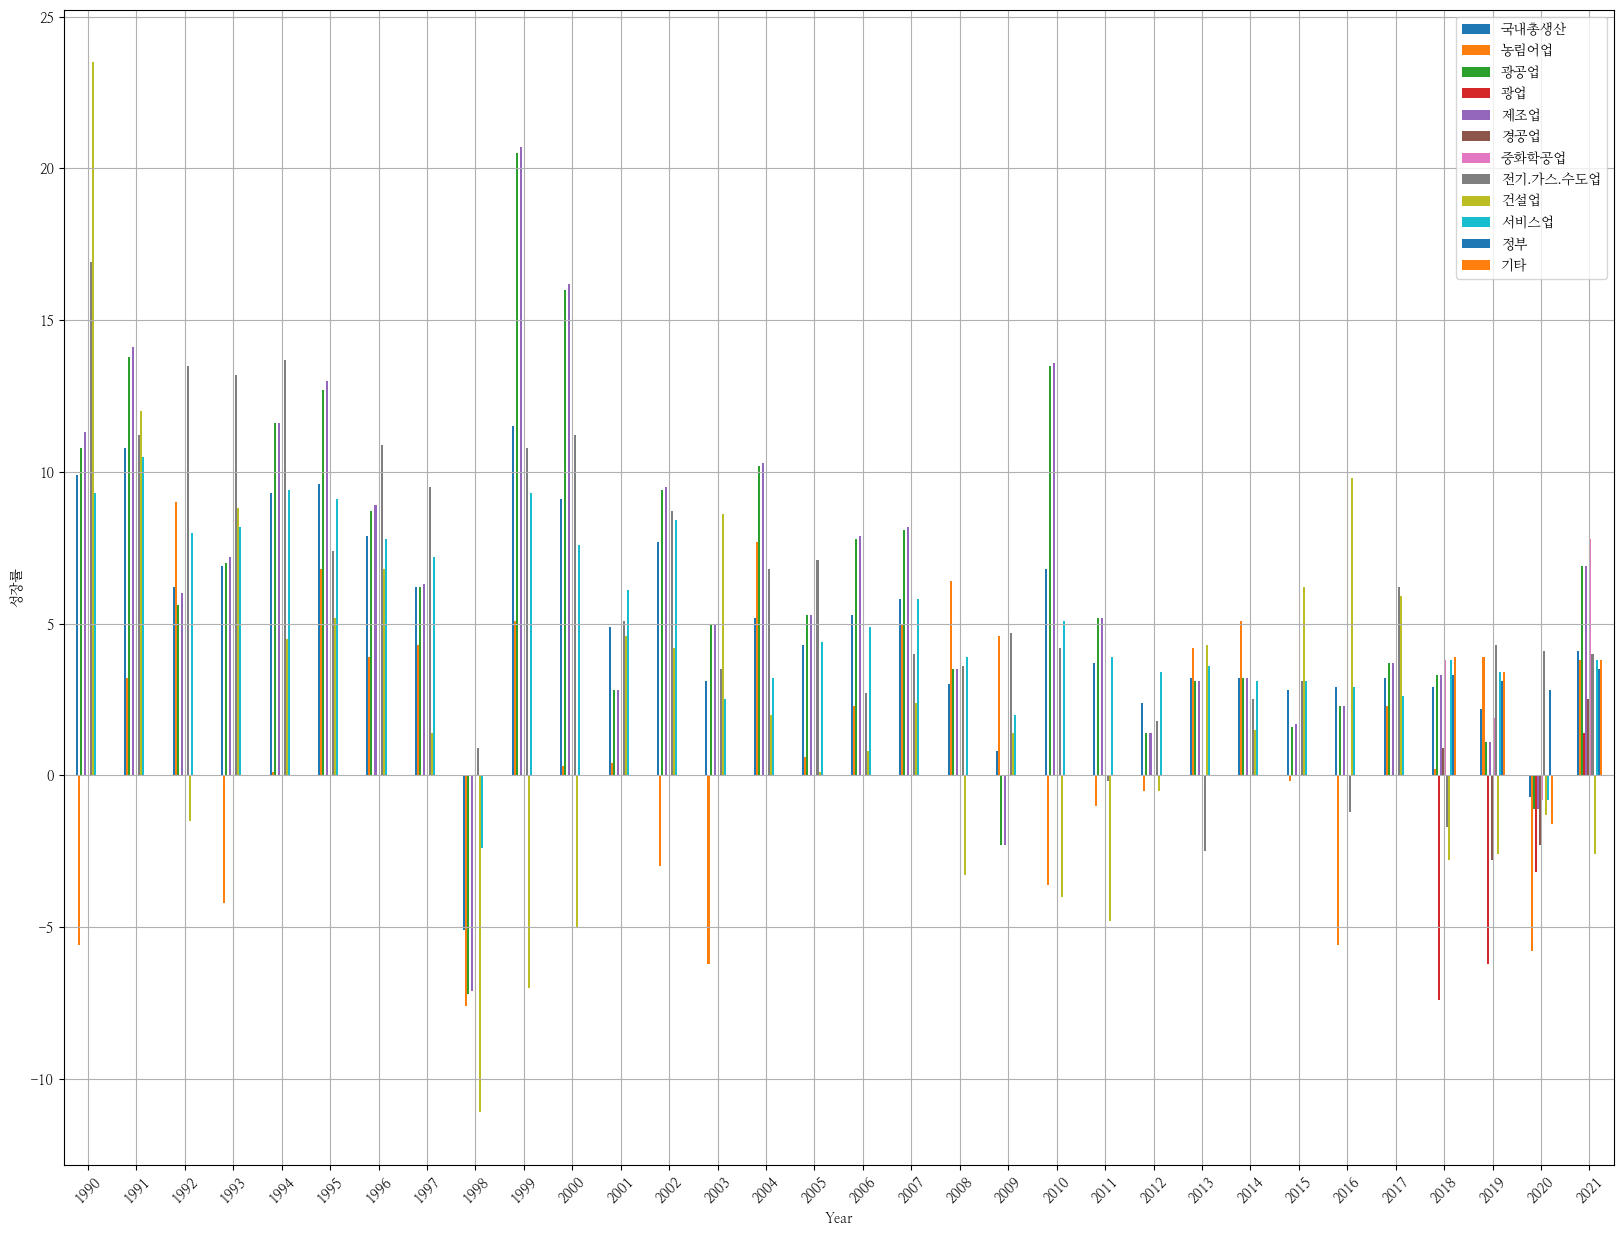

In [16]:
T_gr.plot(kind='bar', figsize=(20, 15), grid=True, xlabel = 'Year', ylabel = '성장률')
plt.xticks(rotation = 45)

## 데이터 표기가 되어있지 않았던 광업, 경공업, 중화학공업, 정부, 기타 는 배제후 다시 그래프를 그림

## 관심있게 다룰 것은 국내 총샌산과 서비스업

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019'),
  Text(30, 0, '2020'),
  Text(31, 0, '2021')])

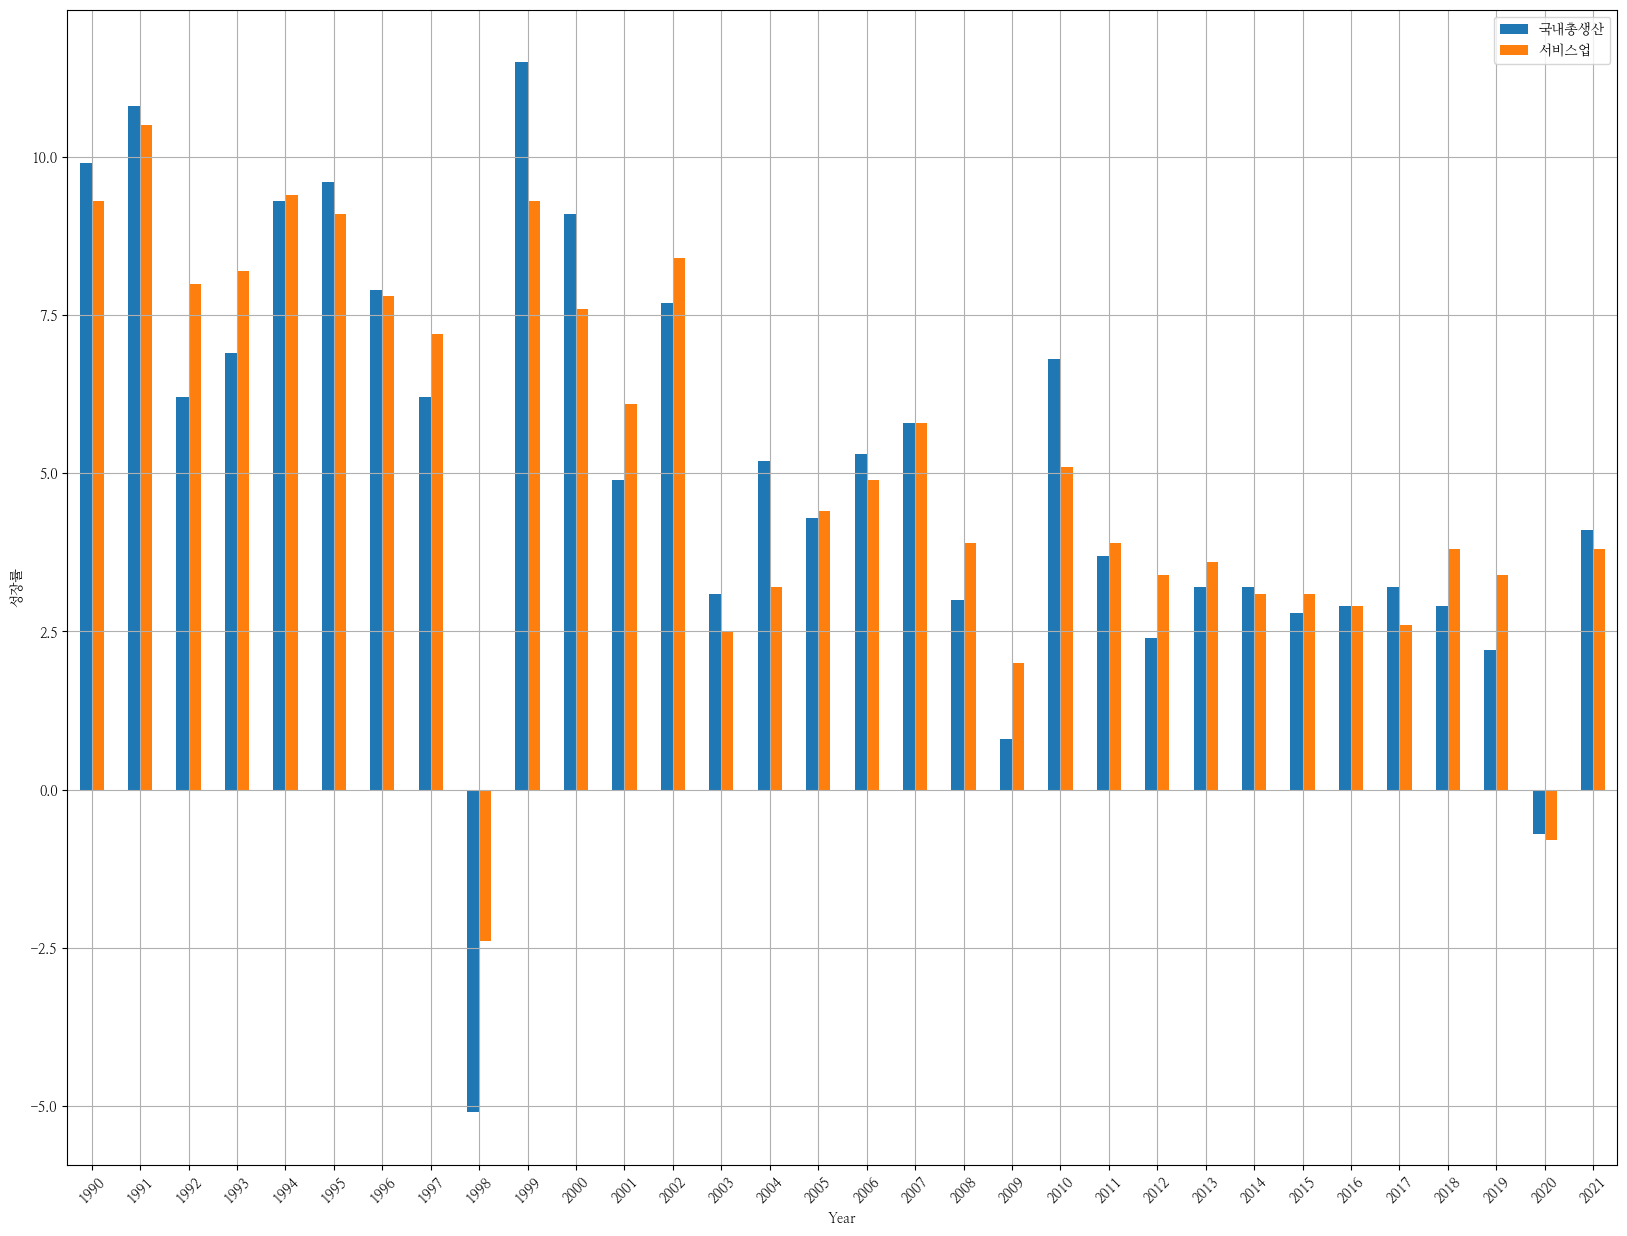

In [15]:
T_gr.plot(y = ['국내총생산', '서비스업'], kind='bar', figsize=(20, 15), grid=True, xlabel = 'Year', ylabel = '성장률')
plt.xticks(rotation = 45)

## 1998년은 IMF의 영향으로 국내총생산과 같이 하향성장률을, 2020년은 코로나의 영향으로 국내총생산과 같이 하향성장률을 볼 수 있었으며  
## 그 나머지해는 국내총생산과 더불어 꾸준한 성장세를 보임을 알 수 있다.

## 서비스업중 관심있게 찾아볿 분야는 콘텐츠산업  
어떻게 얼마나 수출을 했는지 좀더 자세히 알아보기 위해 콘텐츠 산업 수출액 현황을 가져왔다

In [17]:
Contents_Exports = pd.read_csv('data/contents_exports.csv', encoding='euc-kr')

In [18]:
Contents_Exports

,구분(1),2005,2006,2007,2008,2009,2010,2010.1,2010.2,2010.3,...,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3
0,구분(1),수출액,수출액,수출액,수출액,수출액,수출액,비중,전년대비증감률,연평균증감률,...,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률
1,합계,1301136,1373158,1944631,2337603,2604232,3226092,100,23.9,19.9,...,9.1,16.2,10189026,100,6,15.8,11924284,100,16.3,18.7
2,출판,191346,184867,213100,260010,250764,357881,11.1,42.7,13.3,...,12.7,0.2,214732,2.1,-13.8,-0.9,345960,2.9,61.1,16.6
3,만화,3268,3917,3986,4135,4209,8153,0.3,93.7,20.1,...,14.9,12.2,46010,0.5,13.6,11.9,62715,0.5,36.3,17.9
4,음악,22278,16666,13885,16468,31269,83262,2.6,166.3,30.2,...,10.1,13.9,756198,7.4,34,18.7,679633,5.7,-10.1,11.3
5,영화,75995,24515,24396,21037,14122,13583,0.4,-3.8,-29.1,...,2.2,12.1,37877,0.4,-9,6.6,54157,0.5,43,5.4
6,게임,564660,671994,781004,1093865,1240856,1606102,49.8,29.4,23.3,...,8.2,21.2,6657777,65.3,3.8,20,8193562,68.7,23.1,25.7
7,애니메이션,78429,66834,72770,80583,89651,96827,3,8,4.3,...,20.5,10.8,194148,1.9,11.2,11.3,134532,1.1,-30.7,-0.2
8,방송,121763,133917,150953,171348,184577,228633,7.1,23.9,13.4,...,32,9.2,474359,4.7,-0.9,10.3,692790,5.8,28.5,13.9
9,광고,9359,75981,93859,14212,93152,75554,2.3,-18.9,51.8,...,-34.3,-5.4,139083,1.4,126.9,10.1,119935,1,-13.8,2.2


In [19]:
Contents_Exports.to_csv('data/2전.csv')

In [20]:
Contents_Exports.index = ['구분','합계','출판','만화','음악','영화','게임','애니메이션','방송','광고','캐릭터','지식정보','콘텐츠솔루션','독립제작사']
del Contents_Exports['구분(1)']
Contents_Exports

,2005,2006,2007,2008,2009,2010,2010.1,2010.2,2010.3,2011,...,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3
구분,수출액,수출액,수출액,수출액,수출액,수출액,비중,전년대비증감률,연평균증감률,수출액,...,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률
합계,1301136,1373158,1944631,2337603,2604232,3226092,100,23.9,19.9,4302012,...,9.1,16.2,10189026,100,6,15.8,11924284,100,16.3,18.7
출판,191346,184867,213100,260010,250764,357881,11.1,42.7,13.3,283439,...,12.7,0.2,214732,2.1,-13.8,-0.9,345960,2.9,61.1,16.6
만화,3268,3917,3986,4135,4209,8153,0.3,93.7,20.1,17213,...,14.9,12.2,46010,0.5,13.6,11.9,62715,0.5,36.3,17.9
음악,22278,16666,13885,16468,31269,83262,2.6,166.3,30.2,196113,...,10.1,13.9,756198,7.4,34,18.7,679633,5.7,-10.1,11.3
영화,75995,24515,24396,21037,14122,13583,0.4,-3.8,-29.1,15829,...,2.2,12.1,37877,0.4,-9,6.6,54157,0.5,43,5.4
게임,564660,671994,781004,1093865,1240856,1606102,49.8,29.4,23.3,2378078,...,8.2,21.2,6657777,65.3,3.8,20,8193562,68.7,23.1,25.7
애니메이션,78429,66834,72770,80583,89651,96827,3,8,4.3,115941,...,20.5,10.8,194148,1.9,11.2,11.3,134532,1.1,-30.7,-0.2
방송,121763,133917,150953,171348,184577,228633,7.1,23.9,13.4,222372,...,32,9.2,474359,4.7,-0.9,10.3,692790,5.8,28.5,13.9
광고,9359,75981,93859,14212,93152,75554,2.3,-18.9,51.8,102224,...,-34.3,-5.4,139083,1.4,126.9,10.1,119935,1,-13.8,2.2


In [21]:
Con_E1 = Contents_Exports.loc[:,'2005':'2010']
Con_E1

,2005,2006,2007,2008,2009,2010
구분,수출액,수출액,수출액,수출액,수출액,수출액
합계,1301136,1373158,1944631,2337603,2604232,3226092
출판,191346,184867,213100,260010,250764,357881
만화,3268,3917,3986,4135,4209,8153
음악,22278,16666,13885,16468,31269,83262
영화,75995,24515,24396,21037,14122,13583
게임,564660,671994,781004,1093865,1240856,1606102
애니메이션,78429,66834,72770,80583,89651,96827
방송,121763,133917,150953,171348,184577,228633
광고,9359,75981,93859,14212,93152,75554


In [22]:
Con_E2 = Contents_Exports.loc[:,'2010.1':'2020.3']
Con_E2

,2010.1,2010.2,2010.3,2011,2011.1,2011.2,2011.3,2012,2012.1,2012.2,...,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3
구분,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,...,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률
합계,100,23.9,19.9,4302012,100,34.9,22.1,4611505,100,7.2,...,9.1,16.2,10189026,100,6,15.8,11924284,100,16.3,18.7
출판,11.1,42.7,13.3,283439,6.6,-20.8,6.8,245154,5.3,-13.5,...,12.7,0.2,214732,2.1,-13.8,-0.9,345960,2.9,61.1,16.6
만화,0.3,93.7,20.1,17213,0.4,111.1,31.9,17105,0.4,-0.6,...,14.9,12.2,46010,0.5,13.6,11.9,62715,0.5,36.3,17.9
음악,2.6,166.3,30.2,196113,4.6,135.5,43.7,235097,5.1,19.9,...,10.1,13.9,756198,7.4,34,18.7,679633,5.7,-10.1,11.3
영화,0.4,-3.8,-29.1,15829,0.4,16.5,-23,20175,0.4,27.5,...,2.2,12.1,37877,0.4,-9,6.6,54157,0.5,43,5.4
게임,49.8,29.4,23.3,2378078,55.3,48.1,27.1,2638916,57.2,11,...,8.2,21.2,6657777,65.3,3.8,20,8193562,68.7,23.1,25.7
애니메이션,3,8,4.3,115941,2.7,19.7,6.7,112542,2.4,-2.9,...,20.5,10.8,194148,1.9,11.2,11.3,134532,1.1,-30.7,-0.2
방송,7.1,23.9,13.4,222372,5.2,20.4,10.6,233821,5.1,5.1,...,32,9.2,474359,4.7,-0.9,10.3,692790,5.8,28.5,13.9
광고,2.3,-18.9,51.8,102224,2.4,35.3,49,97492,2.1,-4.6,...,-34.3,-5.4,139083,1.4,126.9,10.1,119935,1,-13.8,2.2


### 2010년 이후 자료에서는 필요한것은 수출액이기에 수출액만 따로 가져옴

In [23]:
Con_E2 = Con_E2.reindex(columns = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
Con_E2

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
구분,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액
합계,4302012,4611505,4923100,5273519,5661368,6008063,8814441,9615036,10189026,11924284
출판,283439,245154,291863,247268,222736,187388,220951,248991,214732,345960
만화,17213,17105,20982,25562,29354,32482,35262,40501,46010,62715
음악,196113,235097,277328,335650,381023,442566,512580,564236,756198,679633
영화,15829,20175,37071,26380,29374,43894,40726,41607,37877,54157
게임,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
애니메이션,115941,112542,109845,115652,126570,135622,144870,174517,194148,134532
방송,222372,233821,309399,336019,320434,411212,362403,478447,474359,692790
광고,102224,97492,102881,76407,94508,109804,93230,61293,139083,119935


In [24]:
Con_E = pd.concat([Con_E1,Con_E2], axis=1)
Con_E

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
구분,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액
합계,1301136,1373158,1944631,2337603,2604232,3226092,4302012,4611505,4923100,5273519,5661368,6008063,8814441,9615036,10189026,11924284
출판,191346,184867,213100,260010,250764,357881,283439,245154,291863,247268,222736,187388,220951,248991,214732,345960
만화,3268,3917,3986,4135,4209,8153,17213,17105,20982,25562,29354,32482,35262,40501,46010,62715
음악,22278,16666,13885,16468,31269,83262,196113,235097,277328,335650,381023,442566,512580,564236,756198,679633
영화,75995,24515,24396,21037,14122,13583,15829,20175,37071,26380,29374,43894,40726,41607,37877,54157
게임,564660,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
애니메이션,78429,66834,72770,80583,89651,96827,115941,112542,109845,115652,126570,135622,144870,174517,194148,134532
방송,121763,133917,150953,171348,184577,228633,222372,233821,309399,336019,320434,411212,362403,478447,474359,692790
광고,9359,75981,93859,14212,93152,75554,102224,97492,102881,76407,94508,109804,93230,61293,139083,119935


필요한 연도별 수출액만을 가져온 결과값

In [25]:
Con_E = Con_E.drop(['구분'], axis = 0)
Con_E

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
합계,1301136,1373158,1944631,2337603,2604232,3226092,4302012,4611505,4923100,5273519,5661368,6008063,8814441,9615036,10189026,11924284
출판,191346,184867,213100,260010,250764,357881,283439,245154,291863,247268,222736,187388,220951,248991,214732,345960
만화,3268,3917,3986,4135,4209,8153,17213,17105,20982,25562,29354,32482,35262,40501,46010,62715
음악,22278,16666,13885,16468,31269,83262,196113,235097,277328,335650,381023,442566,512580,564236,756198,679633
영화,75995,24515,24396,21037,14122,13583,15829,20175,37071,26380,29374,43894,40726,41607,37877,54157
게임,564660,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
애니메이션,78429,66834,72770,80583,89651,96827,115941,112542,109845,115652,126570,135622,144870,174517,194148,134532
방송,121763,133917,150953,171348,184577,228633,222372,233821,309399,336019,320434,411212,362403,478447,474359,692790
광고,9359,75981,93859,14212,93152,75554,102224,97492,102881,76407,94508,109804,93230,61293,139083,119935
캐릭터,163666,189451,202889,228250,236521,276328,392266,416454,446219,489234,551456,612842,663853,745142,791338,715816


In [26]:
Con_E

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
합계,1301136,1373158,1944631,2337603,2604232,3226092,4302012,4611505,4923100,5273519,5661368,6008063,8814441,9615036,10189026,11924284
출판,191346,184867,213100,260010,250764,357881,283439,245154,291863,247268,222736,187388,220951,248991,214732,345960
만화,3268,3917,3986,4135,4209,8153,17213,17105,20982,25562,29354,32482,35262,40501,46010,62715
음악,22278,16666,13885,16468,31269,83262,196113,235097,277328,335650,381023,442566,512580,564236,756198,679633
영화,75995,24515,24396,21037,14122,13583,15829,20175,37071,26380,29374,43894,40726,41607,37877,54157
게임,564660,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
애니메이션,78429,66834,72770,80583,89651,96827,115941,112542,109845,115652,126570,135622,144870,174517,194148,134532
방송,121763,133917,150953,171348,184577,228633,222372,233821,309399,336019,320434,411212,362403,478447,474359,692790
광고,9359,75981,93859,14212,93152,75554,102224,97492,102881,76407,94508,109804,93230,61293,139083,119935
캐릭터,163666,189451,202889,228250,236521,276328,392266,416454,446219,489234,551456,612842,663853,745142,791338,715816


In [27]:
Con_E.replace('-' , 0, inplace=True)
Con_E

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
합계,1301136,1373158,1944631,2337603,2604232,3226092,4302012,4611505,4923100,5273519,5661368,6008063,8814441,9615036,10189026,11924284
출판,191346,184867,213100,260010,250764,357881,283439,245154,291863,247268,222736,187388,220951,248991,214732,345960
만화,3268,3917,3986,4135,4209,8153,17213,17105,20982,25562,29354,32482,35262,40501,46010,62715
음악,22278,16666,13885,16468,31269,83262,196113,235097,277328,335650,381023,442566,512580,564236,756198,679633
영화,75995,24515,24396,21037,14122,13583,15829,20175,37071,26380,29374,43894,40726,41607,37877,54157
게임,564660,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
애니메이션,78429,66834,72770,80583,89651,96827,115941,112542,109845,115652,126570,135622,144870,174517,194148,134532
방송,121763,133917,150953,171348,184577,228633,222372,233821,309399,336019,320434,411212,362403,478447,474359,692790
광고,9359,75981,93859,14212,93152,75554,102224,97492,102881,76407,94508,109804,93230,61293,139083,119935
캐릭터,163666,189451,202889,228250,236521,276328,392266,416454,446219,489234,551456,612842,663853,745142,791338,715816


In [28]:
Con_E.to_csv('data/2후.csv')

In [29]:
Con_E = Con_E.astype(float)
print(Con_E.dtypes)

2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object


<AxesSubplot:xlabel='Year', ylabel='수출량'>

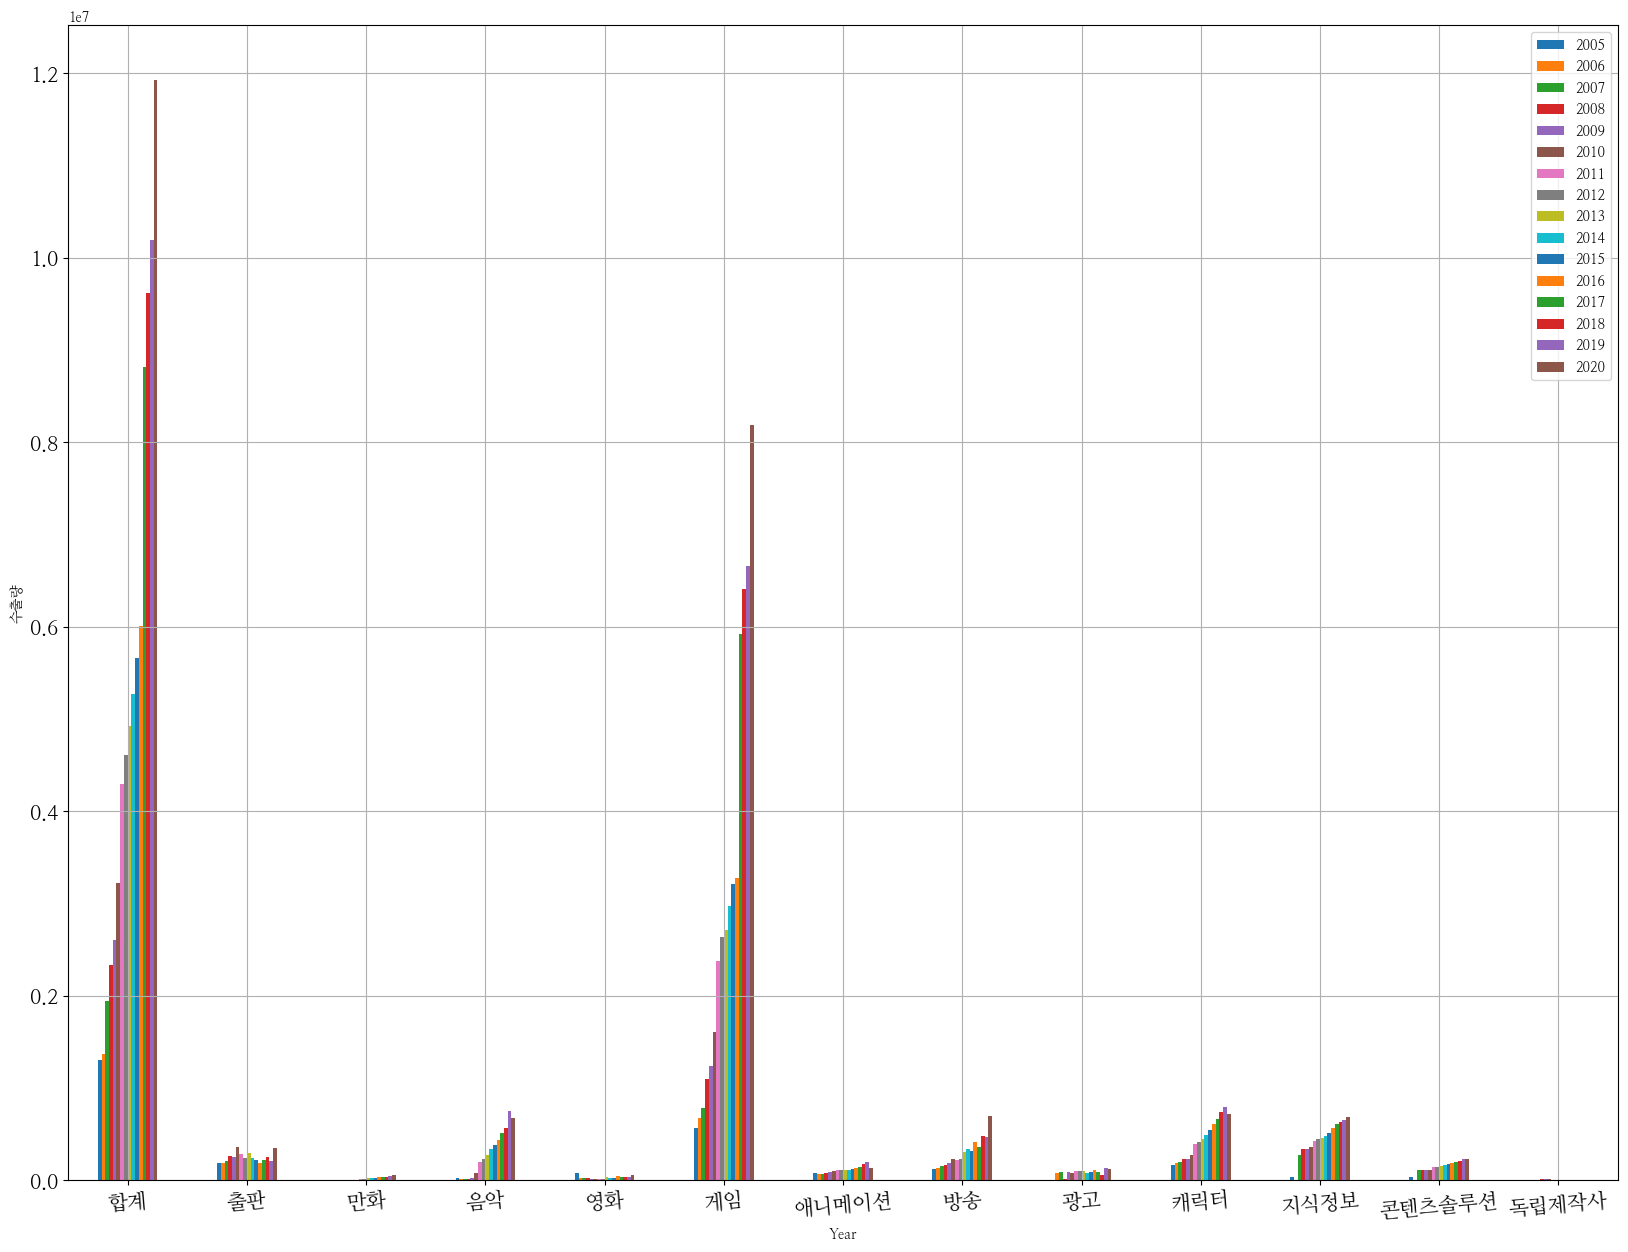

In [70]:
Con_E.plot(kind='bar', figsize=(20, 15) , grid=True, xlabel = 'Year', ylabel = '수출량', rot=5, fontsize =15 )

In [149]:
def plotting(a):
    return T_gr.plot(kind='bar', figsize=(20, 15), y = [a], grid=True, xlabel = 'Year', ylabel = '성장률', rot=5, fontsize =15 )


연도별 꾸준히 증가하는 수출액 규모를 확인할 수 있었으며 그 중 제일 확고한 성장세가 보이는 게임산업분야를 좀더 집중해서 관찰

In [31]:
game_exports = pd.read_csv('data/game_industry_exports.csv', encoding='euc-kr')

In [32]:
game_exports

,지역별(1),2002,2002.1,2003,2004,2006,2007,2008,2008.1,2008.2,...,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,2020.2,2020.3
0,지역별(1),수출액,비중,수출액,수출액,수출액,수출액,수출액,비중,전년대비증감률,...,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률,수출액,비중,전년대비증감률,연평균증감률
1,전체,140796,100,4299,1909,671994,781004,1093865,100,40.1,...,8.2,39.9,6657777,100,3.8,6,8193562,100,23.1,13
2,중화권,-,-,-,-,-,-,-,-,-,...,-12.7,47,3663741,55,22.9,3.6,4085018,49.9,11.5,17.1
3,일본,22527,16,589,265,217726,242892,227524,20.8,-6.3,...,10.2,22.9,684948,10.3,-24.6,-8.8,308533,3.8,-55,-41.7
4,동남아시아,19711,14,385,259,49055,103093,241744,22.1,134.5,...,-11.4,31.6,742982,11.2,12.3,-0.2,1626161,19.8,118.9,56.8
5,북미,26751,19,1293,801,133727,138238,184863,16.9,33.7,...,148.7,68.7,607709,9.1,-40.5,21.7,916414,11.2,50.8,-5.2
6,유럽,19711,14,873,232,42336,41393,92979,8.5,124.6,...,53.7,11.3,399499,6,-4.5,21.1,683505,8.3,71.1,27.8
7,기 타,9856,7,71,189,70559,14058,54693,5,289.1,...,64.3,38.9,558898,8.4,32.6,47.6,573931,7,2.7,16.7
8,중국,42239,30,1088,163,158591,241330,292062,26.7,21,...,-,-,-,-,-,-,-,-,-,-


In [33]:
game_exports.to_csv('data/3전.csv')

In [34]:
game_exports_n = game_exports.reindex(columns = ['2002','2003','2004','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])

In [35]:
game_exports_n

,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액
1,140796,4299,1909,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3413471,2981534,3663741,4085018
3,22527,589,265,217726,242892,227524,328827,435254,652556,703368,725012,910064,690722,600810,824036,907991,684948,308533
4,19711,385,259,49055,103093,241744,186128,242521,428277,496325,510495,540665,359898,381918,746298,661550,742982,1626161
5,26751,1293,801,133727,138238,184863,152625,147761,181255,202337,209086,204468,553460,358595,410366,1020542,607709,916414
6,19711,873,232,42336,41393,92979,101750,138125,152369,159258,162924,120340,346188,337581,272311,418469,399499,683505
7,9856,71,189,70559,14058,54693,38467,46577,56325,58952,59739,240966,207240,218500,256516,421405,558898,573931
8,42239,1088,163,158591,241330,292062,433059,595864,907296,1018676,1048144,957331,1057119,1379942,-,-,-,-


In [36]:
game_exports_n.index = ['지역별','전체','중화권','일본','동남아시아','북미','유럽','기타','중국']
# del Contents_Exports['구분(1)']
game_exports_n

,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
지역별,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액,수출액
전체,140796,4299,1909,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
중화권,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3413471,2981534,3663741,4085018
일본,22527,589,265,217726,242892,227524,328827,435254,652556,703368,725012,910064,690722,600810,824036,907991,684948,308533
동남아시아,19711,385,259,49055,103093,241744,186128,242521,428277,496325,510495,540665,359898,381918,746298,661550,742982,1626161
북미,26751,1293,801,133727,138238,184863,152625,147761,181255,202337,209086,204468,553460,358595,410366,1020542,607709,916414
유럽,19711,873,232,42336,41393,92979,101750,138125,152369,159258,162924,120340,346188,337581,272311,418469,399499,683505
기타,9856,71,189,70559,14058,54693,38467,46577,56325,58952,59739,240966,207240,218500,256516,421405,558898,573931
중국,42239,1088,163,158591,241330,292062,433059,595864,907296,1018676,1048144,957331,1057119,1379942,-,-,-,-


In [37]:
game_exports_n=game_exports_n.drop(['지역별'], axis=0)
game_exports_n

,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
전체,140796,4299,1909,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
중화권,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3413471,2981534,3663741,4085018
일본,22527,589,265,217726,242892,227524,328827,435254,652556,703368,725012,910064,690722,600810,824036,907991,684948,308533
동남아시아,19711,385,259,49055,103093,241744,186128,242521,428277,496325,510495,540665,359898,381918,746298,661550,742982,1626161
북미,26751,1293,801,133727,138238,184863,152625,147761,181255,202337,209086,204468,553460,358595,410366,1020542,607709,916414
유럽,19711,873,232,42336,41393,92979,101750,138125,152369,159258,162924,120340,346188,337581,272311,418469,399499,683505
기타,9856,71,189,70559,14058,54693,38467,46577,56325,58952,59739,240966,207240,218500,256516,421405,558898,573931
중국,42239,1088,163,158591,241330,292062,433059,595864,907296,1018676,1048144,957331,1057119,1379942,-,-,-,-


In [38]:
game_exports_n.replace('-' , 0, inplace=True)
game_exports_n

,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
전체,140796,4299,1909,671994,781004,1093865,1240856,1606102,2378078,2638916,2715400,2973834,3214627,3277346,5922998,6411491,6657777,8193562
중화권,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3413471,2981534,3663741,4085018
일본,22527,589,265,217726,242892,227524,328827,435254,652556,703368,725012,910064,690722,600810,824036,907991,684948,308533
동남아시아,19711,385,259,49055,103093,241744,186128,242521,428277,496325,510495,540665,359898,381918,746298,661550,742982,1626161
북미,26751,1293,801,133727,138238,184863,152625,147761,181255,202337,209086,204468,553460,358595,410366,1020542,607709,916414
유럽,19711,873,232,42336,41393,92979,101750,138125,152369,159258,162924,120340,346188,337581,272311,418469,399499,683505
기타,9856,71,189,70559,14058,54693,38467,46577,56325,58952,59739,240966,207240,218500,256516,421405,558898,573931
중국,42239,1088,163,158591,241330,292062,433059,595864,907296,1018676,1048144,957331,1057119,1379942,0,0,0,0


In [39]:
game_exports_n = game_exports_n.astype(float)
print(game_exports_n.dtypes)

2002    float64
2003    float64
2004    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
dtype: object


In [40]:
game_exports_n.to_csv('data/3후.csv')

<AxesSubplot:xlabel='국가별 수출현황', ylabel='수출액규무'>

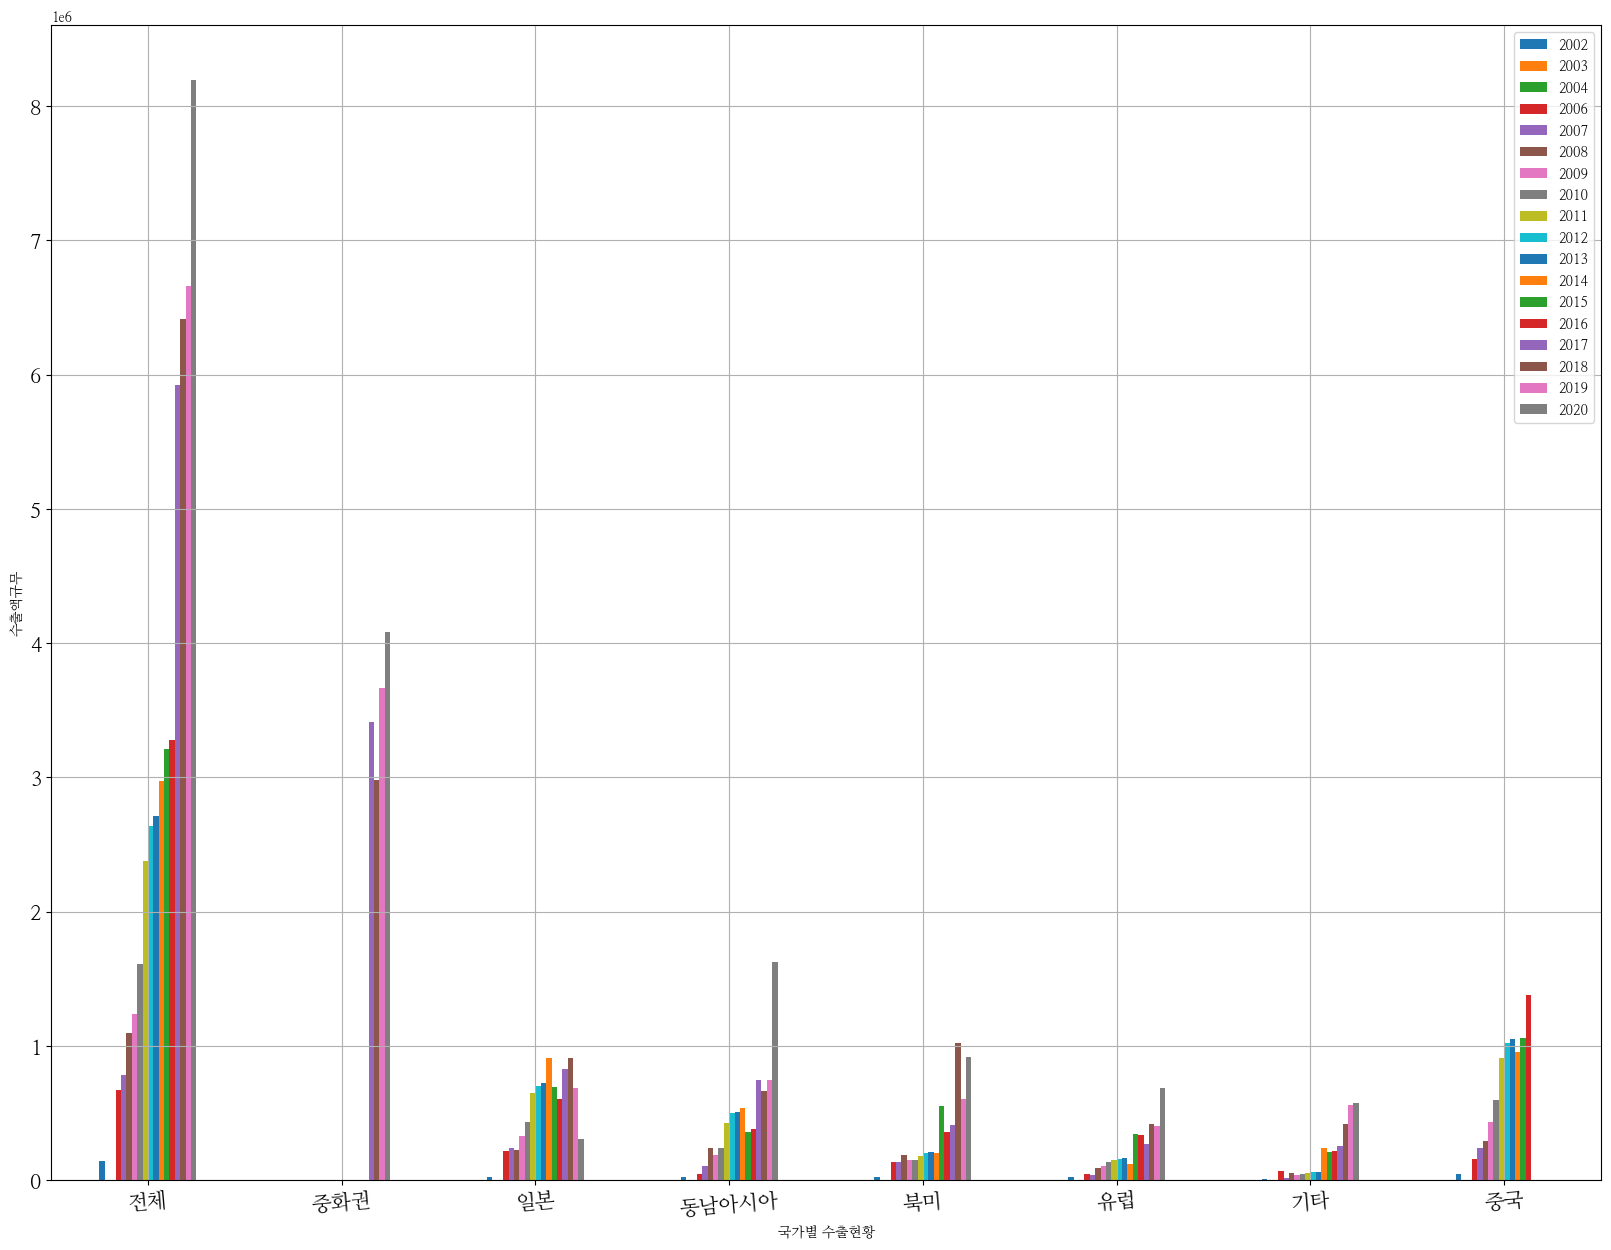

In [43]:
game_exports_n.plot(kind='bar', figsize=(20, 15) , grid=True, xlabel = '국가별 수출현황', ylabel = '수출액규무', rot=5, fontsize =15 )

확인해보면 전체적인 국가에 대한 수출량이 증가하고 있음을 확인할 수 있었고, 예외적으로 중국의 정책으로 인해 중국으로의 게임수출이 2017년부터 안됐음을 확인할 수 있었음.

종사자수 확인

In [42]:
game_workers = pd.read_csv('data/game_industry_workers.csv', encoding='euc-kr')
game_workers


,통계분류(1),통계분류(2),2011,2011.1,2011.2,2011.3,2011.4,2012,2012.1,2012.2,...,2019.2,2019.3,2019.4,2019.5,2020,2020.1,2020.2,2020.3,2020.4,2020.5
0,통계분류(1),통계분류(2),합계,29세 이하,30~34세,35~39세,40세 이상,합계,29세 이하,30~34세,...,30~34세,35~39세,40~49세,50세 이상,합계,29세 이하,30~34세,35~39세,40~49세,50세 이상
1,합계,소계,95015,32123,31025,17549,14318,95051,32125,31239,...,15482,13956,13759,4132,83303,35787,18027,15129,11506,2854
2,게임 제작 및 배급업,소계,51859,20106,21171,7205,3377,52466,20332,21517,...,11313,10646,7627,864,44310,11138,12522,11553,7852,1245
3,게임 제작 및 배급업,PC게임,122,11,33,46,32,106,9,28,...,3917,3767,2520,257,14600,2812,4550,4268,2663,307
4,게임 제작 및 배급업,모바일게임,4585,1789,1725,682,389,5823,2113,2236,...,6759,6209,4368,386,27028,7735,7342,6662,4600,689
5,게임 제작 및 배급업,콘솔게임,-,-,-,-,-,-,-,-,...,245,264,428,74,1110,204,253,241,318,94
6,게임 제작 및 배급업,아케이드게임,713,198,226,204,85,719,199,229,...,392,406,311,147,1572,387,377,382,271,155
7,게임 제작 및 배급업,온라인게임,44221,17627,18329,5722,2543,44036,17627,18296,...,-,-,-,-,-,-,-,-,-,-
8,게임 제작 및 배급업,비디오게임,2218,481,858,551,328,1782,384,728,...,-,-,-,-,-,-,-,-,-,-
9,게임 제작 및 배급업,비중,100,38.8,40.8,13.9,6.5,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [43]:
game_workers.to_csv('data/4전.csv')

In [44]:
game_workers_C_index = game_workers.reindex(columns = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
game_workers_C_index.index = ['통계분류','합계','소계','PC게임','모바일게임','콘솔게임','아케이드게임','온라인게임','비디오게임','비중','소계','컴퓨터게임방운영업','전자게임장운영업','비중','소계']
gc_n = game_workers_C_index.drop(['통계분류'], axis = 0)
gc = gc_n.drop(['비중'], axis=0)
gc.replace('-', 0, inplace=True)
gc = gc.astype(int)
gc

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
합계,95015,95051,91893,87281,80388,73993,81932,85492,89157,83303
소계,51859,52466,40541,39221,35445,33979,34665,37035,39390,44310
PC게임,122,106,307,333,385,212,13287,13344,13430,14600
모바일게임,4585,5823,10215,9984,13106,16146,19686,21742,23057,27028
콘솔게임,0,0,0,0,0,0,477,529,1348,1110
아케이드게임,713,719,430,395,441,716,1215,1420,1555,1572
온라인게임,44221,44036,29267,28202,21198,16523,0,0,0,0
비디오게임,2218,1782,322,307,315,382,0,0,0,0
소계,43156,42585,51352,48060,44943,40014,47267,48457,49767,38993
컴퓨터게임방운영업,42161,41698,50496,47145,43913,38358,45378,46853,48810,38154


In [45]:
gc.to_csv('data/4후.csv')

<AxesSubplot:xlabel='종목별 수출현황', ylabel='수출액규모'>

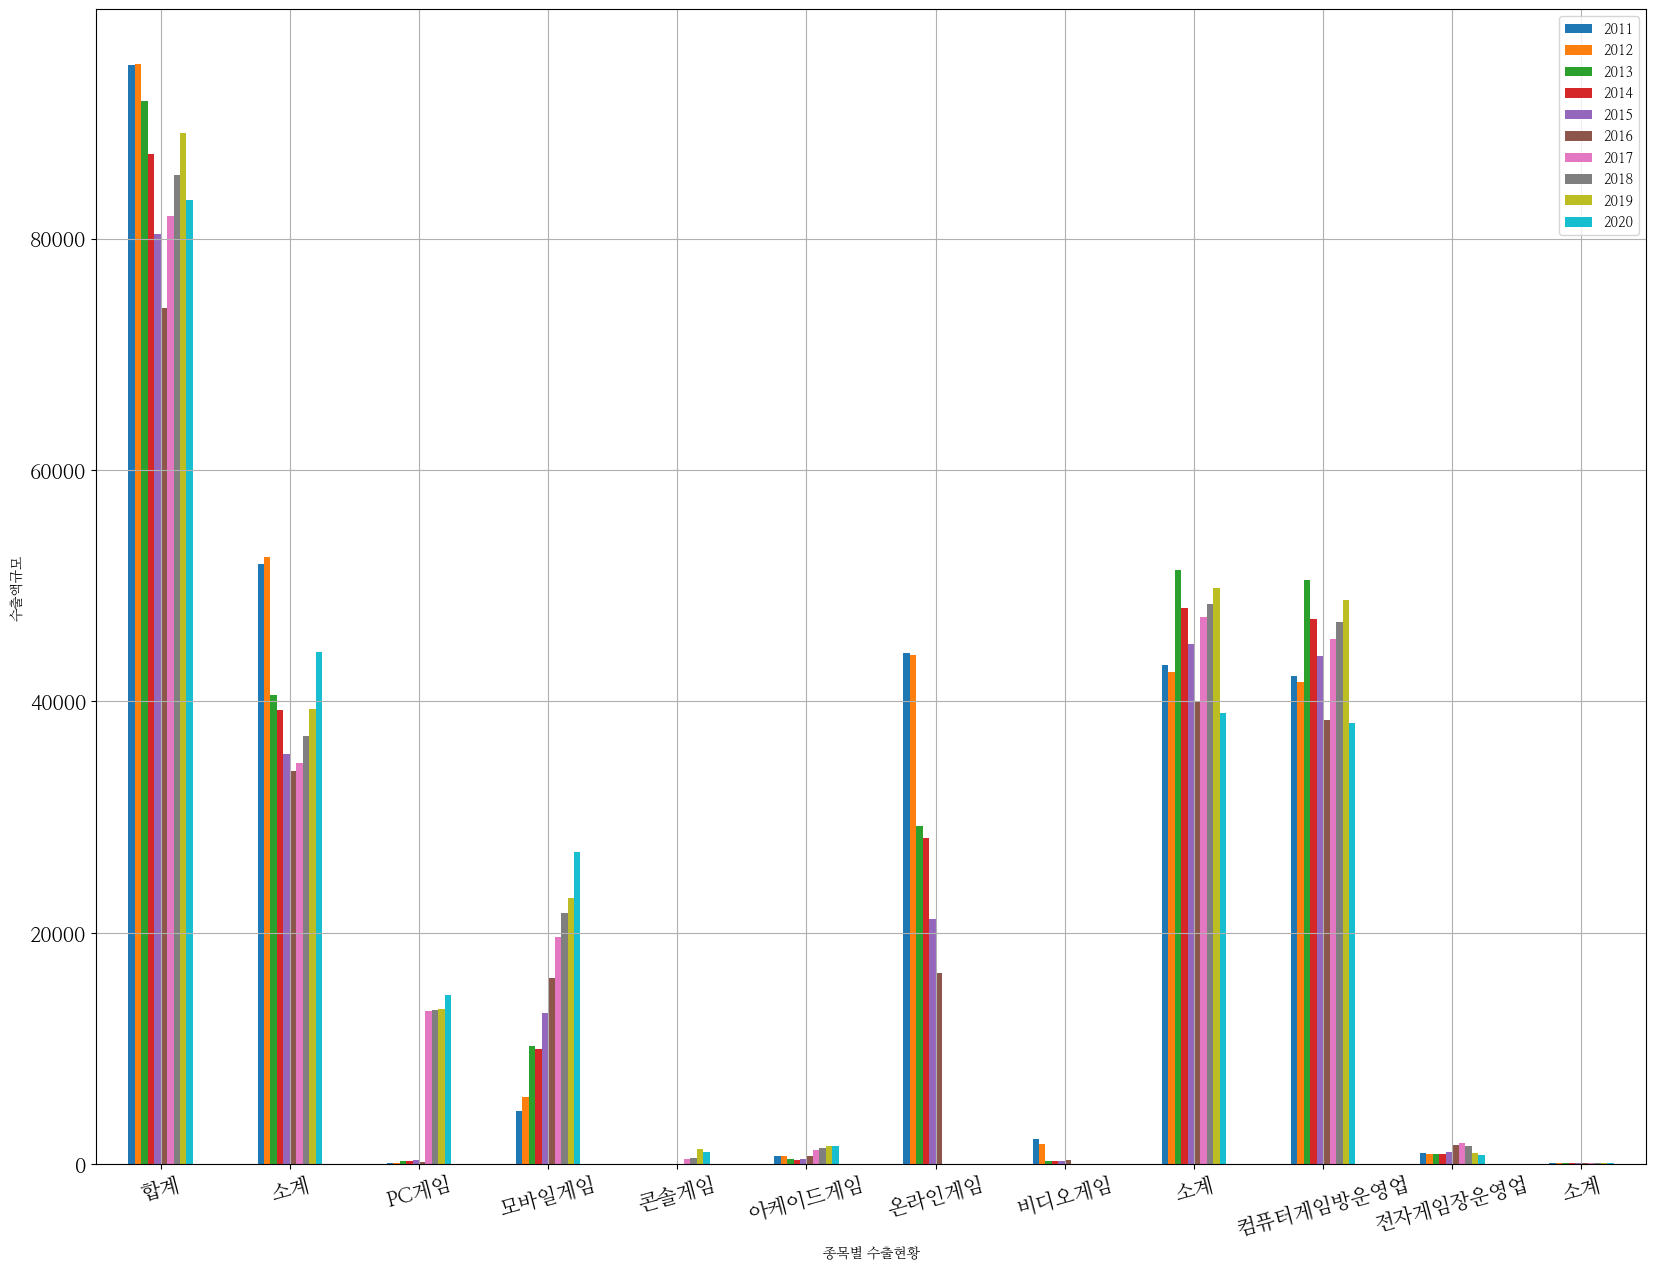

In [69]:
gc.plot(kind='bar', figsize=(20, 15) , grid=True, xlabel = '종목별 수출현황', ylabel = '수출액규모', rot=15, fontsize =15 )